1) Create  a  random  vector  with  200  entries,  consisting  of  positive  values.  One  way  to  do  this  could be 
abs(randn(200,1)).  Plot  the  histogram  of  the  data  and  find  its  skewness.  Then  use  the  command 
`boxcox` in Matlab to transform it to a dataset with smaller skewness. Plot the new histogram. 

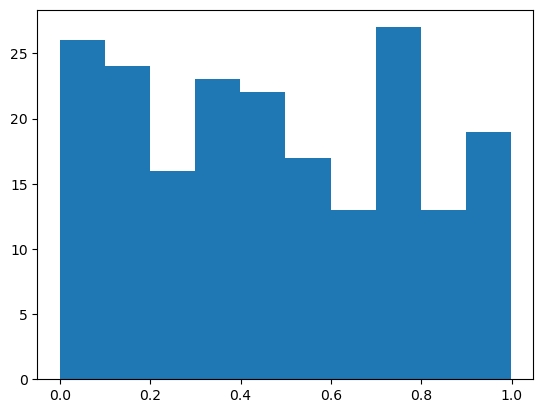

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn import preprocessing

random_vector = np.random.rand(200, 1)
plt.hist(random_vector.flatten())
plt.show()

In [2]:
scipy.stats.skew(random_vector.flatten())

0.12934301309619572

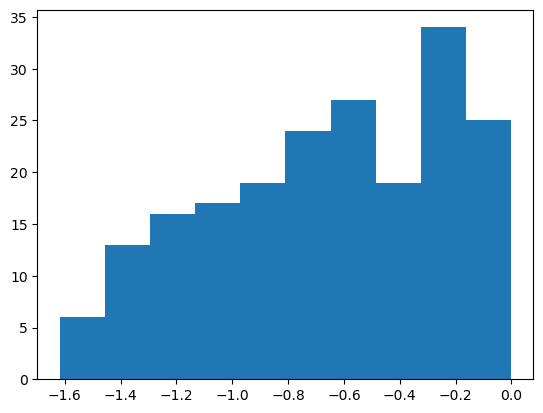

In [3]:
random_vector_xformed, lmbda = scipy.stats.boxcox(np.ravel(random_vector))
plt.hist(random_vector_xformed.flatten())
plt.show()

In [4]:
print(f"lambda of boxcox: {lmbda}")
print(f"skewness of boxcox transformed vector: {scipy.stats.skew(random_vector_xformed)}")

lambda of boxcox: 0.6161677491477279
skewness of boxcox transformed vector: -0.3010380700254316


2) Generate a 2-dimensional dataset in which X1 varies from –1 to +1 in 0.01 increments and X2 is equal to 2xX1 + noise. For noise, you can use random white noise*. Find the scatterplot of the data (X1 vs. X2). Now, augment the dataset by adding 10 outliers to it. Make sure the outlier points are sufficiently different from the rest of the data pattern. Apply the spatial sign transformation to the new augmented dataset and compare the new scatterplot with the original one.

*Make sure you use a small magnitude so that the noise value does not overshadow X2. A magnitude of 0.2 is reasonable.

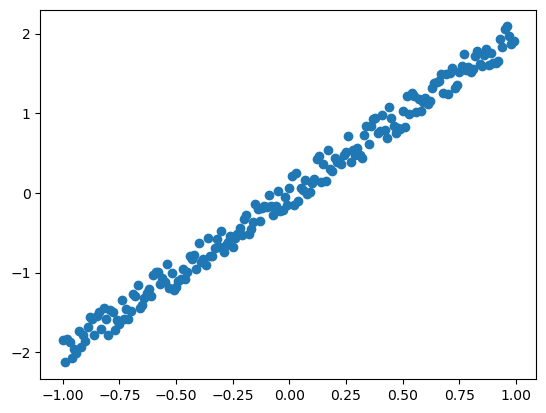

In [5]:
import random

x1 = [x / 100 for x in range(-100, 100)]
x2 = [2 * x_val + random.uniform(-.2, .2) for x_val in x1]

plt.scatter(x1, x2)
plt.show()

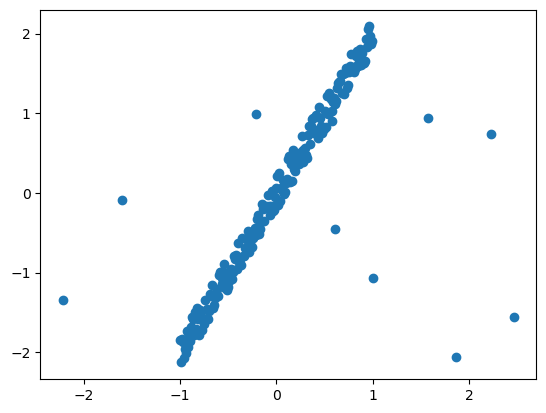

In [6]:
x1_with_outliers = x1 + list(np.random.uniform(-2.5, 2.5, 10) )
x2_with_outliers = x2 + list(np.random.uniform(-2.5, 2.5, 10) )

plt.scatter(x1_with_outliers, x2_with_outliers)
plt.show()

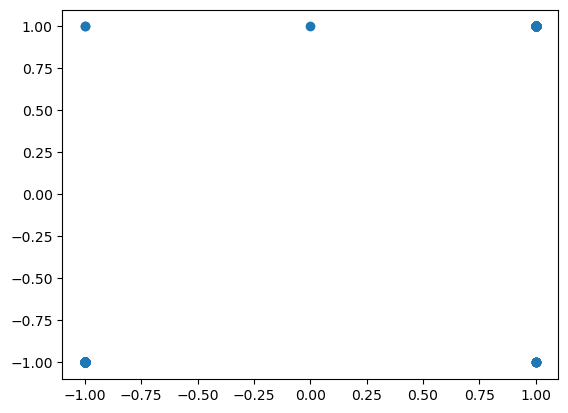

In [7]:
# Per sklearn docs, L2 normalization is same as spatial sign preprocessing
## https://scikit-learn.org/stable/modules/preprocessing.html#normalization

x1_normalized = preprocessing.normalize(np.asarray(x1_with_outliers).reshape(-1, 1), norm="l2")
x2_normalized = preprocessing.normalize(np.asarray(x2_with_outliers).reshape(-1, 1), norm="l2")
plt.scatter(x1_normalized, x2_normalized)
plt.show()

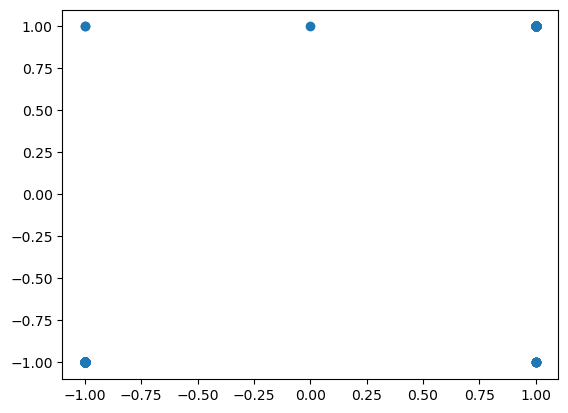

In [8]:
import pandas as pd

def standardize_column_min_max(df_column):

    df_column = (df_column - df_column.min()) / (df_column.max() - df_column.min())

    return df_column

x1_normalized_postprocessing = preprocessing.normalize(np.asarray(standardize_column_min_max(pd.Series(x1_with_outliers))).reshape(-1, 1))
x2_normalized_postprocessing = preprocessing.normalize(np.asarray(standardize_column_min_max(pd.Series(x2_with_outliers))).reshape(-1, 1))

plt.scatter(x1_normalized, x2_normalized)
plt.show()

3) Load the database Pizza.csv. Remove the first two columns and create a data table that consists of only the numeric values (columns 3 through 9). Normalize the matrix and find the principal components. Choose the number of components that explain at least 90% of the variations in data. Transform the data points into the new reduced-dimension domain.

In [9]:
import pandas as pd
from sklearn.decomposition import PCA

pizza_df = pd.read_csv('./Pizza.csv')
NUMERIC_COLUMNS = ['mois', 'prot', 'fat', 'ash', 'sodium', 'carb', 'cal']
pizza_df_numeric_data = pizza_df[NUMERIC_COLUMNS]

def normalize_column_min_max(df_column):

    df_column = (df_column - df_column.min()) / (df_column.max() - df_column.min())

    return df_column

pizza_df_normalized = pd.DataFrame()
for col in pizza_df_numeric_data.columns:
    pizza_df_normalized[col] = normalize_column_min_max(pizza_df_numeric_data[col])

pca = PCA(n_components=0.9)
pca.fit(pizza_df_normalized)


PCA(n_components=0.9)

In [10]:
pca.components_

array([[ 0.21060309,  0.43802639,  0.26074981,  0.48052378,  0.29429634,
        -0.61101679,  0.07024102],
       [-0.6598598 , -0.08642453,  0.32954503,  0.12292779,  0.34779214,
         0.17640078,  0.53040368]])

In [11]:
reduced_dimension_df = pd.DataFrame(pca.transform(pizza_df_normalized), columns=["x1", "x2"])
reduced_dimension_df

,x1,x2
0,1.039049,0.967665
1,1.058409,0.942694
2,0.988682,0.940888
3,0.941202,0.825626
4,0.957416,0.807153
...,...,...
295,-0.098780,-0.160793
296,-0.071873,-0.085490
297,-0.126481,-0.162791
298,-0.135940,-0.285504
